**Programmer: python_scripts (Abhijith Warrier)**

**PYTHON SCRIPT TO *PREDICT WINE QUALITY USING RANDOM FOREST AND EXPLAIN MODEL DECISIONS WITH SHAP*. 🧠🍷📊**

This script demonstrates how to build a **high-performing tabular ML model** and then **explain its predictions** using **SHAP (SHapley Additive exPlanations)** — a critical requirement for real-world ML systems.

---

## **📦 Install Required Packages**

**Install ML and explainability libraries.**

In [ ]:
pip install pandas numpy scikit-learn shap matplotlib

---

## **🧩 Load the Wine Quality Dataset**

**We use the popular UCI Wine Quality dataset.**

In [1]:
import pandas as pd

df = pd.read_csv("datasets/winequality-red.csv", sep=";")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,5


Features include acidity, sugar, sulphates, alcohol, and more.

Target variable: **quality** (integer score).

---

## **🔍 Basic Data Inspection**

**Understand feature distributions and target range.**

In [2]:
print(df.info())
print(df["quality"].value_counts().sort_index())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         20 non-null     float64
 1   volatile acidity      20 non-null     float64
 2   citric acid           20 non-null     float64
 3   residual sugar        20 non-null     float64
 4   chlorides             20 non-null     float64
 5   free sulfur dioxide   20 non-null     int64  
 6   total sulfur dioxide  20 non-null     int64  
 7   density               20 non-null     float64
 8   pH                    20 non-null     float64
 9   sulphates             20 non-null     float64
 10  alcohol               20 non-null     float64
 11  quality               20 non-null     int64  
dtypes: float64(9), int64(3)
memory usage: 2.0 KB
None
quality
4     1
5    12
6     5
7     2
Name: count, dtype: int64


Wine quality prediction is typically treated as a **regression problem**.

---

## **✂️ Train/Test Split**

**Split features and target variable.**

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop("quality", axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

---

## **🌲 Train a Random Forest Regressor**

**Random Forest captures complex, non-linear relationships.**

In [4]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(
    n_estimators=300,
    max_depth=12,
    random_state=42
)

model.fit(X_train, y_train)

,n_estimators,300
,criterion,'squared_error'
,max_depth,12
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


---

## **📊 Evaluate Model Performance**

**Evaluate predictions using regression metrics.**

In [5]:
from sklearn.metrics import mean_absolute_error, r2_score

y_pred = model.predict(X_test)

print("MAE:", mean_absolute_error(y_test, y_pred))
print("R² Score:", r2_score(y_test, y_pred))

MAE: 0.2655555555555556
R² Score: -0.24872000000000072


This confirms how well the model predicts wine quality scores.

---

## **🔎 Explain Predictions with SHAP**

**SHAP explains how each feature contributes to predictions.**

In [ ]:
import shap

explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

---

## **📈 Visualize Feature Importance with SHAP**

**Global feature impact on wine quality.**

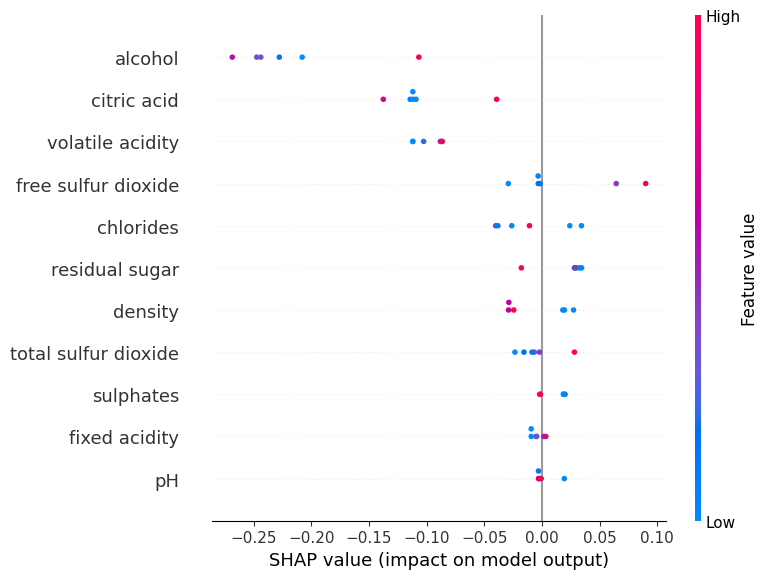

In [7]:
shap.summary_plot(shap_values, X_test)

This plot shows:

- which features matter most
- whether they increase or decrease predicted quality

---

## **🧪 Why Explainability Matters**

- High accuracy alone is not enough
- Stakeholders need to understand *why* predictions happen
- SHAP provides consistent, model-agnostic explanations
- Critical for trust, debugging, and compliance

---

## **Key Takeaways**

1. Wine quality prediction is a strong tabular ML use case.
2. Random Forest models capture non-linear feature interactions.
3. SHAP explains model predictions at both global and local levels.
4. Explainability is essential for real-world ML systems.
5. Performance + interpretability together make models production-ready.

---